# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [445]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [446]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')#completa el código
usage = pd.read_csv('/datasets/usage.csv')#completa el código

In [447]:
plans.head(5)# mostrar las primeras 5 filas de plans

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [448]:
users.head(5)# mostrar las primeras 5 filas de users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [449]:
usage.head(5)# mostrar las primeras 5 filas de usage

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [450]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [451]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [452]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [453]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [454]:
# cantidad de nulos para users
print(users.isna().sum())# Cantidad de valores nulos)
print(users.isna().mean())# Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [455]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
- Indica qué harías: ¿imputar, eliminar, ignorar?

In [456]:
def reporte_nulos_multiple(*dfs):
    print("\n📌 VALORES FALTANTES\n" + "-"*30)
    for df in dfs:
        for col in df.columns:
            prop = df[col].isna().mean()
            if prop > 0:
                print(f"La columna {col} tiene una proporción de {prop:.2%}")

# Ejecutar reporte
reporte_nulos_multiple(users, usage)



📌 VALORES FALTANTES
------------------------------
La columna city tiene una proporción de 11.72%
La columna churn_date tiene una proporción de 88.35%
La columna date tiene una proporción de 0.12%
La columna duration tiene una proporción de 55.19%
La columna length tiene una proporción de 44.74%


**Acciones a tomar**


**-City:** se podría crear una clasificación con el nombre "Sin Ciudad" o incluso se podría analizar más a fondo si existe una correlación con algún otro dato o columna para poder resolver algún problema dentro del flujo de recaudación de data.

**-Churn_date:** en el análisis de la columna se pudo detectar que el dtype es de tipo object. Como primer paso se debe convertir los datos a datetime64 para que, a partir de los resultados, tengamos mayor contexto de la situación y podamos determinar que proceso conviene más para la limpieza.
Aunado a ello, deberíamos considerar que la falta de datos se podría tratar de clientes activos; es decir, que no existe registro debido a que los clientes no han dado de baja su servicio de llamadas y/o mensajería.

**-Date:** en el análisis de la columna se pudo detectar que el dtype es de tipo object. Como primer paso se debe convertir los datos a datetime64 para que, a partir de los resultados, tengamos mayor contexto de la situación y podamos determinar que proceso conviene más para la limpieza.
Sin embargo, debemos analizar a fondo si la fecha de la llamada/mensaje realmente impacta como dato para contestar las preguntas del negocio; no quisieramos invertir tiempo y recursos en limpiar datos innecesarios.

**-Duration y Lenght:** al momento en el que analizamos la información de las columnas del DataFrame de usage, fue evidente que no puede existir información simultánea en las columnas 'duration' y 'lenght' porque la primera registra cuanto dura una llamada y la segunda registra la extensión de un texto; es por ello que se debe ignorar los nulos en este caso


### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [457]:
# explorar columnas numéricas de users
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000






- Columna `user_id`
  
**Observación**

  Como lo comenté anteriormente, se debe cambiar el dtype de algunas columnas del DataFrame para evitar confusiones en nuestro análisis. La columna user_id no debería tener un dtype 'int64' lo correcto sería 'object' ya quer un resumen estadístico no hace sentido.

  
- Columna `age`
  
**Observación**

Tenemos el conteo de 4000 registros (lo que hace sentido y coherencia con el DataFrame), la edad promedio en nuestros registros es de 33 años; sin embargo, de primera instancia podemos detectar valores inválidos en la columna ya que el mínimo registrado es un número negativo (dicho error debe corregirse ya que afecta el análisis) y no podemos confiar en nuestros datos estadísticos como lo es la media/promedio e incluso, la desviación estándar (una desviación estándar de 123 no es coherente debido a que estamos analizando edades).

Otra forma de comprobar que nuestro resumen no es del todo confiable, es que la media es de 33 y la mediana de 47 (dicho sesgo se debe a los sentinels que existen en la columna).





In [458]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


Columnas `id` y `user_id`
  
**Observación**

  Como lo comenté anteriormente, se debe cambiar el dtype de algunas columnas del DataFrame para evitar confusiones en nuestro análisis. Ambas columnas no deberían tener un dtype 'int64' lo correcto sería 'object' ya que un resumen estadístico no hace sentido.

In [459]:

# explorar columnas categóricas de users
columnas_user = ['city', 'plan']

users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595



Columna `city`

**Observación**

Existe el registro único de 7 ciudades pero recordemos que anteriormente pudimos detectar que en la columna existen sentinels (?); se debe limpiar y/o corregir dicha situación para poder avanzar correctamente con el análisis. Un dato claro y preciso es que, con una frecuencia de 808, la cuidad de Bogotá es la que nos genera mayores servicios de llamadas y mensajería.

Aunado a ello, podemos rectificar que existen valores faltantes considerables (11.72%).


Columna `plan`

**Observación**

Contamos con todos los registros (4000), existen dos planes disponibles siendo el plan Básico el de mayor preferencia de los usuarios con una frecuencia de 2595 servicios de llamadas y mensajería.


In [460]:
# explorar columna categórica de usage
usage[['type']].describe() # completa el código

,type
count,40000
unique,2
top,text
freq,22092


Columna `type`

**Observación**

Contamos con todos los registros (40000), existen dos tipos (llamadas, mensajes) y ahora podemos detectar información importante adicional: además de que el plan básico es el de mayor preferencia, nuestros clientes utilizan más el servicio de mensajería (55.23%).


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?



#### **Columna `user_id` y `id`**
  
**Diagnóstico**

Las columnas user_id y id no deberían tener un dtype 'int64' lo correcto sería 'object' ya que un resumen estadístico no hace sentido.

**Acción**

-Cambiar el dtype de 'int64' a 'object'



  
#### **Columna `age`**
  
**Diagnóstico**

Tenemos un sesgo en la edad promedio (33 años) como consecuencia de los sentinels que existen en la columna y, aunado a ello, el resumen nos arroja una desviación estándar inflada. 

**Acción**

-Reemplazar los sentinels como -999 por NaN

-Obtener nuevamente el resumen estadístico

-Analizar si existe alguna correlación entre los registros, en la falta de información

-De no encontrar correlación, reemplazar NaN por la mediana


#### **Columna `city`**

**Diagnóstico**

Se pudo detectar que en la columna existen sentinels (?) mostrando valores faltantes considerables (11.72%).

**Acción**

-Reemplazar el sentinel (?) por NaN o por alguna categoría como "Sin Ciudad"


### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [461]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce') # completa el código

In [462]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce') # completa el código

In [463]:
# Revisar los años presentes en `reg_date` de users



# Contar registros por año, incluyendo nulos
reg_years_counts = users['reg_date'].dt.year.value_counts(dropna=False).sort_index()

# Convertir a DataFrame
reg_years_counts = reg_years_counts.to_frame(name='count').reset_index()
reg_years_counts.rename(columns={'index':'year'}, inplace=True)

# Añadir columna con proporción en porcentaje
reg_years_counts['proportion'] = (reg_years_counts['count'] / reg_years_counts['count'].sum()) * 100

# Mostrar resultado
reg_years_counts



,year,count,proportion
0,2022,1314,32.85
1,2023,1316,32.90
2,2024,1330,33.25
3,2026,40,1.00


In [464]:
users['reg_date'].count()

4000

In [465]:

nulos_rage = users['reg_date'].isna().sum()

print(f"Los datos nulos en `reg_date` son {nulos_rage}")


Los datos nulos en `reg_date` son 0


-Columna `reg_date`

**Observación**

En el DataFrame existen registros del año 2022 al 2026. Es decir que, en nuestros registros, existen anomalías debido a que nuestro último año posible es el 2024.

Los datos que analizaremos (2024) dan una suma de 1330 registros, que representan el 33.25% de todo el DataFrame.

In [466]:
# Revisar los años presentes en `date` de usage
# Contar registros por año, incluyendo nulos
date_years_counts = usage['date'].dt.year.value_counts(dropna=False).sort_index()

# Convertir a DataFrame
date_years_counts = date_years_counts.to_frame(name='count').reset_index()
date_years_counts.rename(columns={'index':'year'}, inplace=True)

# Añadir columna con proporción en porcentaje
date_years_counts['proportion'] = (date_years_counts['count'] / date_years_counts['count'].sum()) * 100

# Mostrar resultado
date_years_counts

,year,count,proportion
0,2024.0,39950,99.875
1,NaN,50,0.125


In [467]:
users['reg_date'].count()

4000

-Columna `date`

**Observación**

Solo el 0.12% del total de los datos son nulos. Podríamos evaluar si existe correlación entre columnas que nos pueda indicar si los datos se tratan del mismo año (2024); o como alternativa simplemente podríamos ignorar los 50 registros debido a su baja proporción.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

#### **Columna `reg_date`**
  
**Diagnóstico**

Dentro de la columna se encontraron 40 registros pertenecientes al año 2026 representando el 1% del total de registros.

**Acción**

-Analizar si existe correlación entre dichos registros que nos pueda ayudar a identificar la fecha real

-De no encontrar correlación, se podría ignorar por su baja proporción o clasificarlas como nulos



#### **Columna `date`**
  
**Diagnóstico**

Dentro de la columna se encontraron 50 registros nulos representando el 0.12% del total de registros.

**Acción**

-Analizar si existe correlación entre dichos registros que nos pueda ayudar a identificar el año correcto (2024)

-De no encontrar correlación, se podría ignorar por su baja proporción o clasificarlas como nulos


---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [468]:

#Convertir la columna 'age' a numérico
users['age'] = pd.to_numeric(users['age'], errors='coerce')

#Calcular la mediana ignorando NaN
age_mediana = users['age'].median()

# Reemplazar sentinels (-999) por la mediana
users['age'] = users['age'].replace(-999, age_mediana)

#Verificar cambios
print(users['age'].describe())

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64


In [469]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
print(users['city'].describe())

print("Los nulos en 'city' son", users['city'].isna().sum())

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object
Los nulos en 'city' son 565


In [470]:
users[users['city'].isna()].head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN
14,10014,Luis,Torres,77.0,NaN,2022-01-04 20:00:10.802700675,Basico,NaN
22,10022,Carlos,Torres,37.0,NaN,2022-01-07 00:34:34.118529632,Basico,NaN
23,10023,Luis,Lopez,57.0,NaN,2022-01-07 07:08:52.033008252,Basico,NaN
48,10048,Ana,Garcia,36.0,NaN,2022-01-14 03:26:19.894973743,Basico,NaN
59,10059,Carlos,Gomez,59.0,NaN,2022-01-17 03:43:36.954238559,Premium,NaN
64,10064,Ana,Ramirez,43.0,NaN,2022-01-18 12:35:06.526631658,Premium,NaN
65,10065,Carlos,Gomez,22.0,NaN,2022-01-18 19:09:24.441110277,Premium,NaN
71,10071,Mariana,Torres,60.0,NaN,2022-01-20 10:35:11.927981995,Basico,NaN
72,10072,Luis,Lopez,40.0,NaN,2022-01-20 17:09:29.842460615,Basico,NaN


In [471]:
# Marcar fechas futuras (año > 2024) como NaT
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT

# Verificar cambios
print(users['reg_date'].describe())

print("Los nulos en 'reg_date' son", users['reg_date'].isna().sum())

# Contar registros por año, incluyendo nulos
reg_years_counts = users['reg_date'].dt.year.value_counts(dropna=False).sort_index()

# Convertir a DataFrame
reg_years_counts = reg_years_counts.to_frame(name='count').reset_index()
reg_years_counts.rename(columns={'index':'year'}, inplace=True)

# Añadir columna con proporción en porcentaje
reg_years_counts['proportion'] = (reg_years_counts['count'] / reg_years_counts['count'].sum()) * 100

# Mostrar resultado
reg_years_counts

count                              3960
unique                             3960
top       2024-06-27 06:08:22.325581392
freq                                  1
first               2022-01-01 00:00:00
last                2024-12-31 00:00:00
Name: reg_date, dtype: object
Los nulos en 'reg_date' son 40


,year,count,proportion
0,2022.0,1314,32.85
1,2023.0,1316,32.90
2,2024.0,1330,33.25
3,NaN,40,1.00


In [472]:
users[users['reg_date'].isna()].head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
40,10040,Ana,Garcia,59.0,Medellín,NaT,Basico,NaN
56,10056,Luis,Garcia,29.0,CDMX,NaT,Basico,"1,72187E+18"
60,10060,Carlos,Torres,45.0,CDMX,NaT,Basico,NaN
70,10070,Mariana,Gomez,50.0,CDMX,NaT,Premium,NaN
248,10248,Sofia,Garcia,20.0,Medellín,NaT,Premium,"1,72506E+18"
320,10320,Sofia,Garcia,74.0,GDL,NaT,Premium,NaN
326,10326,Mariana,Torres,51.0,Medellín,NaT,Premium,NaN
505,10505,Luis,Garcia,75.0,CDMX,NaT,Basico,NaN
527,10527,Carlos,Torres,71.0,MTY,NaT,Basico,NaN
646,10646,Luis,Ramirez,50.0,CDMX,NaT,Premium,NaN


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [473]:
# Verificación MAR en usage (Missing At Random) para duration y lenght
usage.groupby('type')[['duration', 'length']] \
     .apply(lambda x: x.isna().mean())

,duration,length
type,,
call,0.000000,0.99933
text,0.999276,0.00000


Es indudable que las columnas`duration` y `length` dependen totalmente de `type`.

La duración hace referencia a las llamadas y la longitud hace referencia a los mensajes de texto.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 


**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas


2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [474]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage['duration'] = pd.to_numeric(usage['duration'], errors='coerce')

#Agregar por user_id
usage_agg = usage.groupby('user_id').agg(
    total_mensajes=('is_text', 'sum'),
    total_llamadas=('is_call', 'sum'),
    minutos_llamadas=('duration', 'sum')
).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,total_mensajes,total_llamadas,minutos_llamadas
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [475]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    'total_mensajes': 'cant_mensajes',
    'total_llamadas': 'cant_llamadas',
    'minutos_llamadas': 'cant_minutos_llamada'
})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [476]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on='user_id', how='left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [477]:
# Resumen estadístico de las columnas numéricas
age_table = users['age'].describe().to_frame().T
age_table['nulos'] = users['age'].isna().sum()
age_table

,count,mean,std,min,25%,50%,75%,max,nulos
age,4000.0,48.12225,17.690408,18.0,33.0,47.0,63.0,79.0,0


In [478]:
# Distribución porcentual del tipo de plan
plan_table = users['plan'].value_counts().to_frame(name='count')
plan_table['distribución'] = users['plan'].value_counts(normalize=True).mul(100)
plan_table

,count,distribución
Basico,2595,64.875
Premium,1405,35.125


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

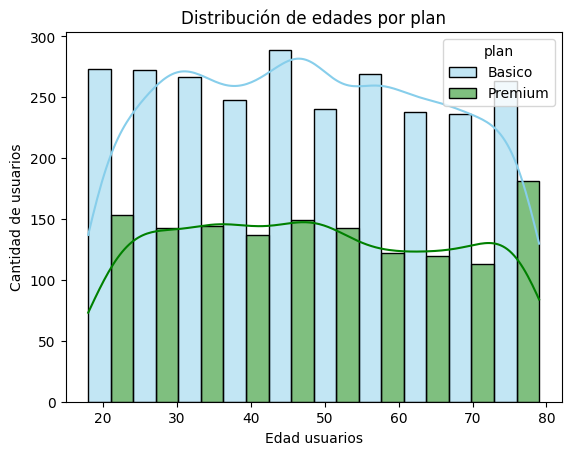

In [479]:
# Histograma para visualizar la edad (age)
sns.histplot(
    data=users,
    x='age',
    hue='plan',
    bins=10,
    kde=True,
    palette=['skyblue', 'green'],
    multiple='dodge'
)

plt.xlabel('Edad usuarios')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de edades por plan')
plt.show()


💡Insights: 
**Distribución**
- Podemos observar que el plan Básico cuenta con mayor demanda que el plan Premium
  
- Los usuarios de aproximadamente 45 años son los que adquieren en mayor cantidad el plan Básico; convirtiendóse en el mercado objetivo por excelencia de dicho plan. En segundo término, valdría la pena crear campañas de marketing para poder aprovechar un mercado promesa como lo es el de edades de 20 a 35 años aprox

- Para el plan Premium el rango de edad que predomina es el de 75 años. Valdría la pena analizar más a fondo que servicio es el que utilizan con mayor frecuencia para entender comportamientos de mercado

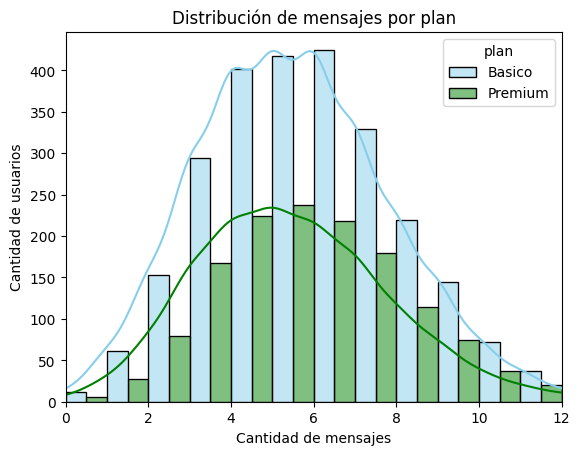

In [480]:
# Histograma para visualizar la cant_mensajes

sns.histplot(
    data=user_profile,
    x='cant_mensajes',
    hue='plan',
    binwidth=1,
    kde=True,
    palette=['skyblue', 'green'],
    multiple='dodge'
)

plt.xlabel('Cantidad de mensajes')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de mensajes por plan')

# Limitar outliers para que el eje X sea legible
plt.xlim(0, user_profile['cant_mensajes'].quantile(0.99))

plt.show()

💡Insights: 
**Distribución**


-Nuevamente se muestra una mayor presencia de mercado en el plan Básico dentro del servicio de mensajería

-Para ambos planes (Básico y Premium) la mayoría de los usuarios envían en promedio 6 mensajes. Valdría la pena profundizar si se trata de un comportamiento de mercado aislado o se debe a alguna promoción de servicio 

-La distribución presenta forma de campana, lo que sugiere un comportamiento aproximadamente normal, con la mayoría de los usuarios concentrados alrededor del valor medio y pocos valores extremos


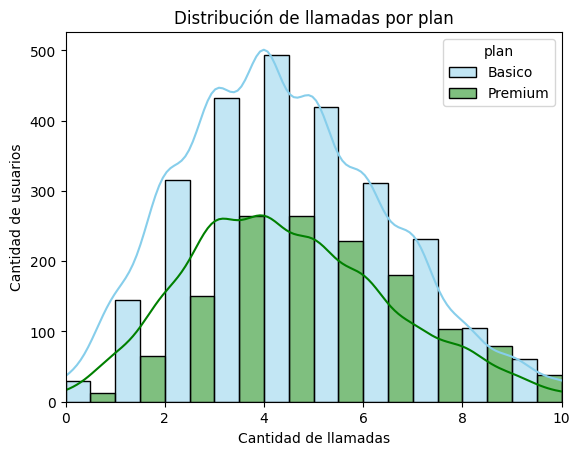

In [481]:
# Histograma para visualizar la cant_llamadas

sns.histplot(
    data=user_profile,
    x='cant_llamadas',
    hue='plan',
    binwidth=1,
    kde=True,
    palette=['skyblue', 'green'],
    multiple='dodge'
)

plt.xlabel('Cantidad de llamadas')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de llamadas por plan')

# Limitar outliers para que el eje X sea legible
plt.xlim(0, user_profile['cant_llamadas'].quantile(0.99))

plt.show()


💡Insights: 
**Distribución**

-Nuevamente se muestra una mayor presencia de mercado en el plan Básico dentro del servicio de llamadas

-Dentro del plan Básico la mayoría de los usuarios realizan en promedio 4 llamadas

-En contraste, en el plan Premium se abarca un rango de 4 a 5 llamadas 

-Hago hincapié en la necesidad de poder aportar mayor profundidad al análisis, al preguntarse si existe un factor adicional que orille a los usuarios a contar con comportamientos parecidos en los servicios sin importar que plan hayan contratado


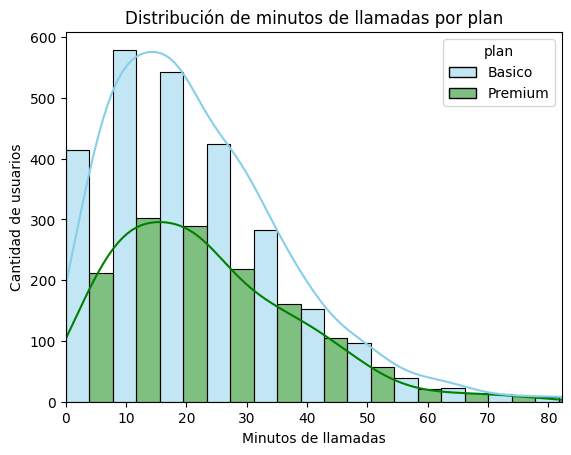

In [482]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(
    data=user_profile,
    x='cant_minutos_llamada',
    hue='plan',
    bins=20,
    kde=True,
    palette=['skyblue', 'green'],
    multiple='dodge'
)

plt.xlabel('Minutos de llamadas')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de minutos de llamadas por plan')

# Limitar outliers para que el eje X sea legible
plt.xlim(0, user_profile['cant_minutos_llamada'].quantile(0.99))

plt.show()

💡Insights:
**Descripción**

-En ambos planes se puede visualizar un sesgo pronunciado a la derecha. La mayoría de los usuarios prefieren realizar llamadas de poca duración (entre 5 y 25 min aprox)

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

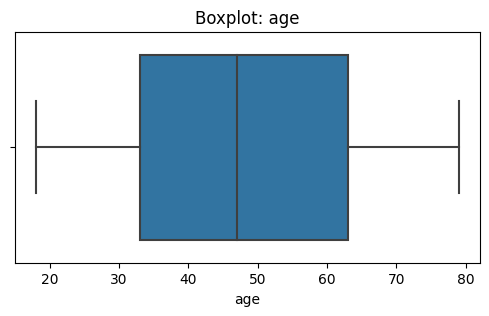

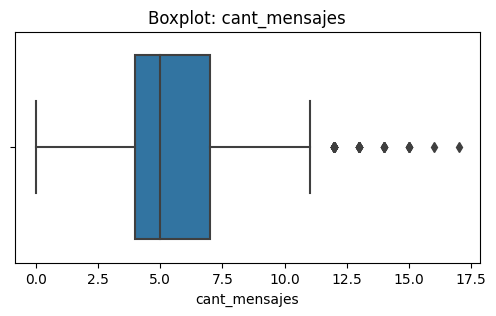

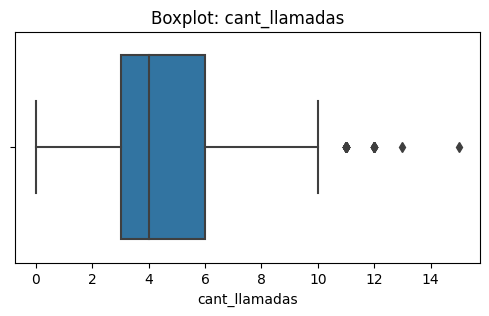

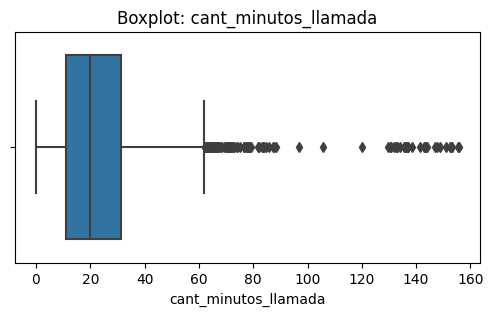

In [483]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
for col in columnas_numericas:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=user_profile[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

💡Insights: 

**- Age:**
no presenta outliers. Las edades registradas suenan lógicas y reales.

**- cant_mensajes:**
se presentan outliers concentrados en el extremo superior. Dicho comportamiento se da gracias a usuarios de alto consumo.

**- cant_llamadas:**
se presentan outliers concentrados en el extremo superior. Dicho comportamiento se da gracias a usuarios de alto consumo.

**- cant_minutos_llamada:**
se presentan outliers concentrados en el extremo superior. Dicho comportamiento se da gracias a usuarios de alto consumo.

In [484]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:

    print(f"\n📌 Columna: {col}")

    Q1 = user_profile[col].quantile(0.25)
    print('Primer cuartil (Q1):', Q1)

    Q3 = user_profile[col].quantile(0.75)
    print('Tercer cuartil (Q3):', Q3)

    IQR = Q3 - Q1
    print('IQR:', IQR)
    
    limite_superior = Q3 + 1.5 * IQR
    print('Límite superior:', limite_superior)

    


📌 Columna: cant_mensajes
Primer cuartil (Q1): 4.0
Tercer cuartil (Q3): 7.0
IQR: 3.0
Límite superior: 11.5

📌 Columna: cant_llamadas
Primer cuartil (Q1): 3.0
Tercer cuartil (Q3): 6.0
IQR: 3.0
Límite superior: 10.5

📌 Columna: cant_minutos_llamada
Primer cuartil (Q1): 11.12
Tercer cuartil (Q3): 31.415
IQR: 20.295
Límite superior: 61.8575


In [485]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 

**Columnas cant_mensajes, cant_llamadas y cant_minutos_llamada**

Para las tres columnas se decide mantener los outliers, ya que, aunque los valores observados son extremos, representan comportamientos reales del mercado.

Es importante destacar la relevancia de generar estrategias comerciales enfocadas en los usuarios de alto consumo.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [486]:
# Crear columna grupo_uso
def clasificar_uso(row):
    
    if row['cant_llamadas'] < 5 and row['cant_mensajes'] < 5:
        return 'Bajo uso'
    
    elif row['cant_llamadas'] < 10 and row['cant_mensajes'] < 10:
        return 'Uso medio'
    
    else:
        return 'Alto uso'


# Crear nueva columna aplicando la función
user_profile['grupo_uso'] = user_profile.apply(clasificar_uso, axis=1)

In [487]:
# verificar cambios
user_profile[['cant_llamadas','cant_mensajes','grupo_uso']].head()

,cant_llamadas,cant_mensajes,grupo_uso
0,3.0,7.0,Uso medio
1,10.0,5.0,Alto uso
2,2.0,5.0,Uso medio
3,3.0,11.0,Alto uso
4,3.0,4.0,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [488]:
# Crear columna grupo_edad
def clasificar_edad(row):
    
    if row['age'] < 30:
        return 'Joven'
    
    elif row['age'] < 60:
        return 'Adulto'
    
    else:
        return 'Adulto Mayor'


# Crear nueva columna
user_profile['grupo_edad'] = user_profile.apply(clasificar_edad, axis=1)

In [489]:
# verificar cambios
user_profile[['age','grupo_edad']].head()

,age,grupo_edad
0,38.0,Adulto
1,53.0,Adulto
2,57.0,Adulto
3,69.0,Adulto Mayor
4,63.0,Adulto Mayor


In [490]:
#Obtener el type más frecuente por usuario (evita duplicados)
type_por_usuario = (
    usage
    .groupby('user_id')['type']
    .agg(lambda x: x.mode()[0])
    .reset_index()
)

#Unir con user_profile
df = user_profile.merge(type_por_usuario, on='user_id', how='left')

#Crear tabla por grupo de edad
tabla = (
    df
    .groupby('grupo_edad')
    .agg(
        conteo=('user_id', 'nunique'),  # cuenta usuarios únicos
        plan_mas_frecuente=('plan', lambda x: x.mode()[0]),
        type_mas_frecuente=('type', lambda x: x.mode()[0])
    )
)

#Calcular porcentaje
tabla['porcentaje'] = (
    tabla['conteo'] / tabla['conteo'].sum() * 100
).round(2)

#Ordenar en descendente
tabla = tabla.sort_values(by='conteo', ascending=False)

#Mostrar resultado
tabla

,conteo,plan_mas_frecuente,type_mas_frecuente,porcentaje
grupo_edad,,,,
Adulto,2018,Basico,text,50.45
Adulto Mayor,1222,Basico,text,30.55
Joven,760,Basico,text,19.00


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

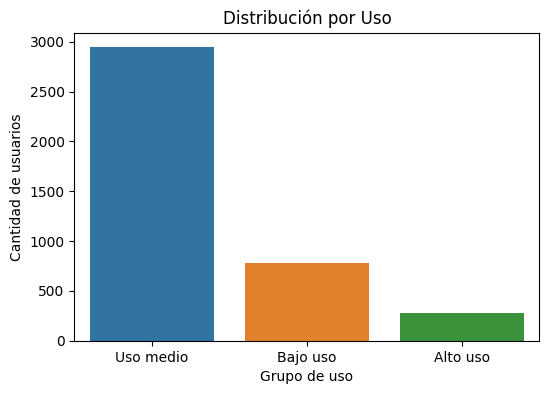

In [491]:
# Visualización de los segmentos por uso
plt.figure(figsize=(6,4))

orden = user_profile['grupo_uso'].value_counts().sort_values(ascending=False).index

sns.countplot(
    data=user_profile,
    x='grupo_uso',
    order=orden
)

plt.title('Distribución por Uso')
plt.xlabel('Grupo de uso')
plt.ylabel('Cantidad de usuarios')

plt.show()

In [492]:
#Conteo por grupo_uso y grupo_edad
conteo = (
    user_profile
    .groupby(['grupo_uso', 'grupo_edad'])
    .size()
    .reset_index(name='conteo')
)

#Total por grupo_uso
conteo['total_grupo_uso'] = (
    conteo
    .groupby('grupo_uso')['conteo']
    .transform('sum')
)

#Proporción dentro de cada grupo_uso
conteo['proporcion_%'] = (
    conteo['conteo'] / conteo['total_grupo_uso'] * 100
).round(2)

#Grupo_edad más frecuente por cada grupo_uso
resultado = (
    conteo
    .sort_values(['grupo_uso', 'conteo'], ascending=[True, False])
    .drop_duplicates('grupo_uso')
)

#Ordenar de mayor a menor por conteo
resultado = resultado.sort_values('conteo', ascending=False).reset_index(drop=True)

resultado[['grupo_uso', 'grupo_edad', 'conteo', 'proporcion_%']]

,grupo_uso,grupo_edad,conteo,proporcion_%
0,Uso medio,Adulto,1500,50.97
1,Bajo uso,Adulto,364,46.79
2,Alto uso,Adulto,154,55.20


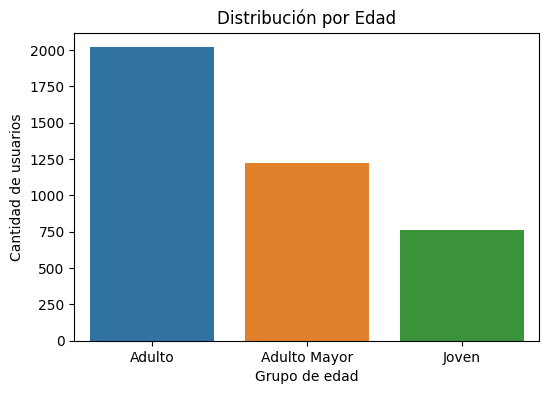

In [493]:
# Visualización de los segmentos por edad
plt.figure(figsize=(6,4))

orden = user_profile['grupo_edad'].value_counts().index  # ya viene de mayor a menor

sns.countplot(
    data=user_profile,
    x='grupo_edad',
    order=orden
)

plt.title('Distribución por Edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad de usuarios')

plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos** 

En la columna `age`con un conteo de 4000 registros se identificó que la edad promedio era de 33 años; sin embargo, se pudieron detectar valores inválidos ya que el mínimo registrado era un número negativo afectando los datos estadísticos e incluso, se visualizó una desviación estándar de 123 (dato imposible hablando de edades) y una mediana de 47 (dicho sesgo a consecuencia de los sentinels en la columna). Como método de limpieza se reemplazó el sentinel -999 con la mediana.

En el DataFrame existían registros del año 2022 al 2026 (columna `reg_date`) Es decir, había anomalías debido a que el último año posible era el 2024. 
Los datos de interés para nuestro análisis (2024) dieron una suma de 1330 registros, que representando el 33.25% de todo el DataFrame y solo el 0.12% del total de los datos fueron nulos. Como alternativa simplemente Se ignoraron los 50 registros debido a su baja proporción.

Se identificaron valores faltantes en las columnas `duration`(55.19%) y `length`(44.74%); sin embargo después de un análisis adicional se determinó que ambas columnas dependen totalmente de type. La duración hace referencia a las llamadas y la longitud hace referencia a los mensajes de texto.

📌Se encontraron valores faltantes en otras columnas tales como: City (11.72%), Churn_date (88.35%) y Date (0.12%). Se manejaron los datos en etapa de limpieza sin embargo no representan importancia para nuestro análisis y evaluación de preguntas del negocio.



🔍 **Segmentos por Edad**

El comportamiento de mercado en ConnectaTel es bastante contundente y se encuentra bien definido. Su `mercado objetivo` son las personas que oscilan entre los `30 y 59 años de edad` representando el `50.45%`. Se debe analizar a fondo si las estrategias de mercado actuales son las que están captando este mercado en específico o simplemente es un comportamiento orgánico; una vez que se tenga identificado lo anterior, se recomienda lo siguiente:

- Si es consecuencia de una estrategia de mercado actual, valdría la pena no solo reforzarla para la captación de un mayor número de usuarios de este rango de edad sino también el desarrollo de estrategias adicionales que vayan dirigidas a los segmentos restantes con el fin de impulsar su consumo e incluso, para lograr entender sus necesidades particulares y expectativas de servicio (que indudablemente no están siendo atendidas en su totalidad) para poder ocupar mayor espacio dentro del ámbito de telecomunicaciones.

- En su defecto, si se trata de un comportamiento orgánico se debe impulsar una campaña comercial para aprovechar la presencia en este segmento de mercado y captar mayor utilidad para la empresa.

Contamos con información adicional como lo es que los tres segmentos prefieren el plan Básico y el servicio de mensajería. Nuevamente, se requiere indagar a mayor profundidad dichas preferencias ya que, como la práctica y la lógica han demostrado a lo largo del tiempo, todos los mercados se llegan a diferenciar en hábitos de compra y uso de servicios. Podría llegar a intuirse de primera instancia que los beneficios y/o facilidades del plan Básico y mensajería son más promocionados o generan un valor comercial para todos y cada uno de los usuarios de ConnectaTel. Se recomienda hacer un estudio de las ofertas comerciales de la empresa y apartir de ello, tomar decisiones sobre sus productos, precios, campañas de marketing, etc.
  

📊 **Segmentos por Nivel de Uso**

En todos y cada uno de los niveles de uso, la edad predominante son los Adultos. Sin embargo, un aspecto importante a recalcar es que el `55.20%` de los `heavy users` pertenecen a dicho segmento. Nuevamente se comprueba que los outliers detectados en etapa tempranas del análisis se trataban de registros reales y esenciales. 

💡Se hace hincapié en las recomendaciones en el punto anterior; recordemos que un correcto entendimiento de mercado permitirá mayor claridad, eficiencia y eficacia en la designación de recursos que, a su vez, representen ganancias y valor a la empresa.


## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`